(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation. With help of the t-SNE algorithms, you may have to plot fewer exploratory data analysis plots next time you work with high dimensional data.

PCA is a linear algorithm. It will not be able to interpret complex polynomial relationship between features. On the other hand, t-SNE is based on probability distributions with random walk on neighborhood graphs to find the structure within the data.

A major problem with, linear dimensionality reduction algorithms is that they concentrate on placing dissimilar data points far apart in a lower dimension representation. But in order to represent high dimension data on low dimension, non-linear manifold, it is important that similar datapoints must be represented close together, which is not what linear dimensionality reduction algorithms do.

In [7]:
## importing the required packages
import plotly.offline as py
py.init_notebook_mode(connected=True)
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

In [2]:
## Loading and curating the data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

In [3]:
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

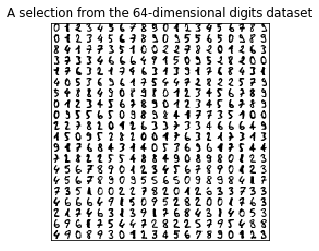

In [4]:
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

Computing PCA projection


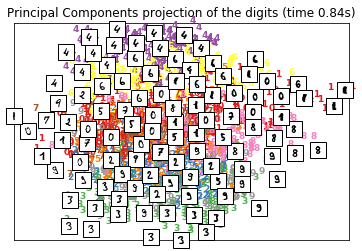

In [7]:
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

Computing t-SNE embedding


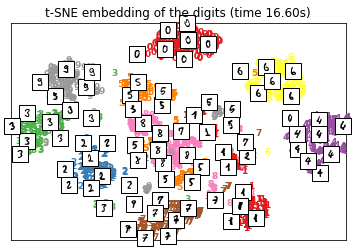

In [8]:
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

In [5]:
## Computing t-SNE
print("Computing t-SNE embedding in 3 dimensions")
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0, verbose=1)
t0 = time()
X_tsne = tsne.fit_transform(X)

Computing t-SNE embedding in 3 dimensions
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121136
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.520978
[t-SNE] Error after 275 iterations: 0.520978


In [8]:
## plotting satter 3-d graph
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    z=X_tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')
